<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_04_ANN_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## Multilayer NN

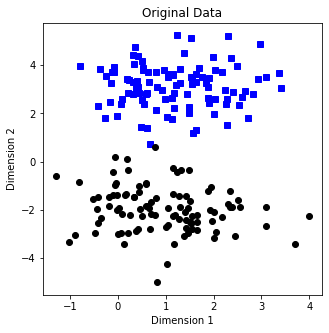

In [12]:
# create the data
nPerClust = 100
blur = 1

A = [1,3]
B = [1,-2]

# Generate the data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# Concatenate into a matrix
data_np = np.hstack((a,b)).T

# Convert into Tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Visualize
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs")
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko")
plt.title("Original Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

### Create Functions to Run the Model

In [14]:
ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
    )
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [17]:
def createANNmodel(learningRate):

    # Model Architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid(),
        )
    
    # define the loss function
    lossfun = nn.BCELoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

    # Model Output
    return ANNclassify, lossfun, optimizer

In [20]:
# Define the function that trains the model
numepochs = 1000

def trainTheModel(ANNclassify):

    # initialize the losses
    losses = torch.zeros(numepochs)

    # loop over the epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNclassify(data)

        # compute loss
        loss = lossfun(yHat,labels)
        losses[epochi] = loss

        # Backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final Forward Pass
    predictions = ANNclassify(data)

    # compute the accuracy
    totalacc = 100*torch.mean(((predictions > 0.5) == labels).float())

    return losses, predictions, totalacc

In [25]:
# Run it once
ANNclassify, lossfun, optimizer = createANNmodel(0.01)

# run the model
losses, predictions, totalacc = trainTheModel(ANNclassify)

print("Model Accuracy is {}%".format(totalacc))

Model Accuracy is 99.5%


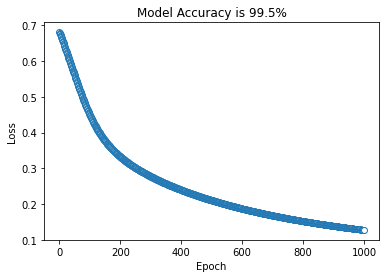

In [26]:
# Plot the whole thing
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Accuracy is {}%".format(totalacc))
plt.show()

In [28]:
# For fancy plotting
predlabels = predictions > 0.5
# find errors
misclassified = np.where(predlabels != labels)[0]

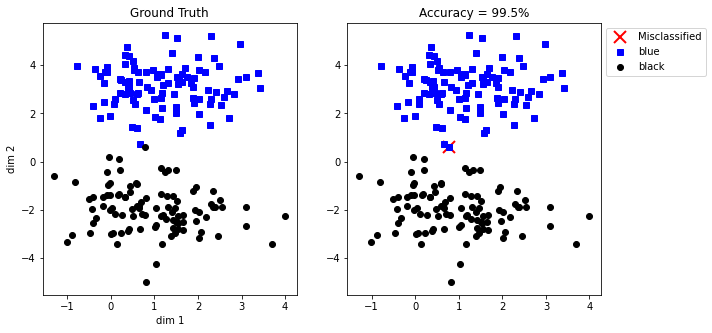

In [29]:
# Put all together
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],"bs")
ax[0].plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],"ko")
ax[0].set_title("Ground Truth")
ax[0].set_xlabel("dim 1")
ax[0].set_ylabel("dim 2")

ax[1].plot(data[misclassified,0], data[misclassified,1], "rx", markersize=12, markeredgewidth=2)
ax[1].plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], "bs")
ax[1].plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], "ko")
ax[1].legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1,1))
ax[1].set_title("Accuracy = {}%".format(totalacc))

plt.show()

### Vary learning rate

In [33]:
learningrates = np.linspace(0.001, 0.1, 50)

# initialize accuracy by learning rate
accByLr = []
allLosses = np.zeros((len(learningrates), numepochs))

# run the loop
for i, lr in enumerate(learningrates):

    # Create-run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions,totalacc = trainTheModel(ANNclassify)

    # store the values
    accByLr.append(totalacc)
    allLosses[i,:] = losses.detach()

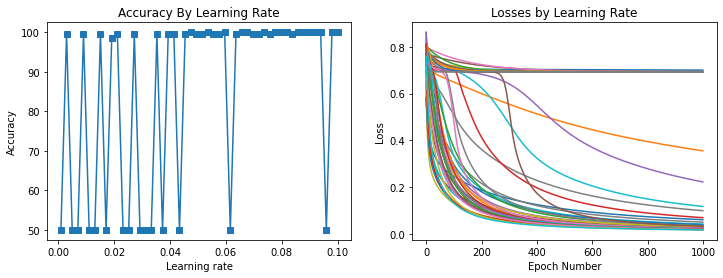

In [35]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates, accByLr, "s-")
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy By Learning Rate")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by Learning Rate")
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss")
 
plt.show()
# Performance seems better than simple single layered one

In [37]:
# Performance above 70%
sum(torch.tensor(accByLr)>70)/len(accByLr)

tensor(0.7000)

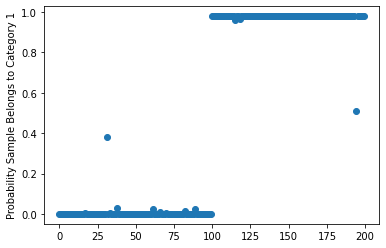

In [44]:
# Explore predictions
plt.plot(predictions.detach(), "o")
plt.ylabel("Probability Sample Belongs to Category 1");

In [52]:
sum(predictions > 0.5)/len(predictions)

tensor([0.5000])

In [54]:
sum((predictions > 0.5) == labels)/len(predictions)

tensor([1.])

In [58]:
# To convert true and false into numbers, use float
((predictions > 0.5) == labels).float()[1:10]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [59]:
# Finally take the average
torch.mean(((predictions > 0.5) == labels).float())

tensor(1.)

In [60]:
# Rerun the same experiment above 50 times and average the results
# Number of iterations (this takes about 12 minutes!)
numExps = 50
learningrates = np.linspace(0.001, 0.1, 50)

# matrix to store all the results
accMeta = np.zeros((numExps, len(learningrates)))

# reduce the number of epochs for efficiency
numepochs = 500

for expi in range(numExps):
    for i, lr in enumerate(learningrates):

        # Create and run the model
        # Create-run the model
        ANNclassify, lossfun, optimizer = createANNmodel(lr)
        losses, predictions,totalacc = trainTheModel(ANNclassify)


        # store the results
        accMeta[expi,i] = totalacc

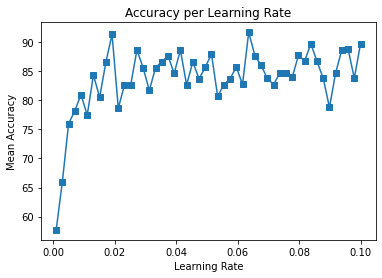

In [61]:
plt.plot(learningrates, np.mean(accMeta,axis=0), "s-")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy per Learning Rate")
plt.show()

## Linear Solutions to Linear Problems

In [62]:
# Rerun the multilayer code aove, but remove nonlinear activation functions from hidden layers
# Compare its performance with the original model
# remove the non-linear classifiers from the model
def createANNmodel(learningRate):

    # Model Architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        #nn.ReLU(),
        nn.Linear(16,1),
        #nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid(),
        )
    
    # define the loss function
    lossfun = nn.BCELoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

    # Model Output
    return ANNclassify, lossfun, optimizer

In [65]:
learningrates = np.linspace(0.001, 0.1, 50)

# initialize accuracy by learning rate
accByLr = []
allLosses = np.zeros((len(learningrates), numepochs))

# run the loop
for i, lr in enumerate(learningrates):

    # Create-run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions,totalacc = trainTheModel(ANNclassify)

    # store the values
    accByLr.append(totalacc)
    allLosses[i,:] = losses.detach()

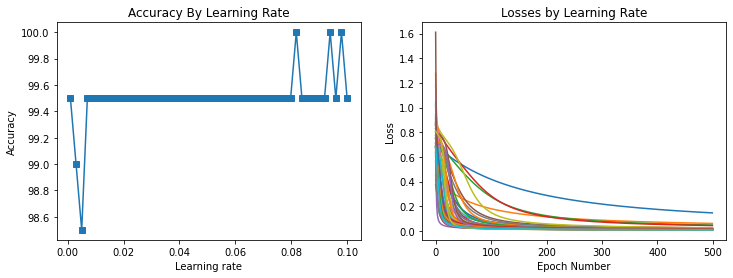

In [68]:
# Min 98% accuracy
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates, accByLr, "s-")
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy By Learning Rate")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by Learning Rate")
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss")
 
plt.show()

In [ ]:
hgfjok